<div style="background-color: #f2f2f2; padding: 20px; position: relative;">
    <h2 style="margin-bottom: 10px;">Exámen final de Big Data: Análisis de Clustering en Tweets</h2>
    <img src="impelia_logo-cabecera_-02.png" alt="Logo Impelia" style="width: 100px; position: absolute; top: 10px; right: 10px;">
    <p style="position: absolute; bottom: -11px; right: 5px; font-style: italic; font-size: 12px;">by Kendry Caravajal y Ana Ortega</p>
</div>


### Import librerías

In [94]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as px
from wordcloud import WordCloud

import re

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords as sws
from nltk.tokenize import WhitespaceTokenizer
sw= set(sws.words('spanish'))
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')

from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.corpus import wordnet

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA


from gensim.models import HdpModel
from gensim.models import LsiModel
from gensim.models import LdaModel
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
import gensim
from gensim.models import CoherenceModel
from gensim.models.coherencemodel import CoherenceModel
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import itertools

from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score, f1_score, homogeneity_completeness_v_measure
from sklearn.metrics.pairwise import pairwise_distances


import warnings
warnings.filterwarnings('ignore')

from IPython.display import display, HTML

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Esteban\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Esteban\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Esteban\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Carga de los dfs

In [2]:
df_cr = pd.read_csv('cr.tsv', sep= '\t', names = ['id', 'texto', 'tipo'])
df_es = pd.read_csv('es.tsv', sep= '\t', names = ['id', 'texto', 'tipo'])
df_mx = pd.read_csv('mx.tsv', sep= '\t', names = ['id', 'texto', 'tipo'])
df_pe = pd.read_csv('pe.tsv', sep= '\t', names = ['id', 'texto', 'tipo'])
df_uy = pd.read_csv('uy.tsv', sep= '\t', names = ['id', 'texto', 'tipo'])

### 1) Exploración y concatenación

In [3]:
df_cr.head()

id                                              texto tipo
0  809927403615256576  En definitiva! Me quedé sin campo para ir a Ta...    N
1  796040775364710400  @dianalaa32 Es una escena de uno de los docume...    P
2  802912779854352384  Qué feo es tener que terminar con alguien; y m...    N
3  800835505717972992  Oído en McDonalds "el mejor mannequin challeng...    N
4  791640101751230464  Tengo que aceptar que me esta hundiendo el con...  NEU

In [4]:
df_es.head()

id                                              texto tipo
0  768512386269638656  @morbosaborealis jajajaja... eso es verdad... ...    N
1  768529956162924544  @Adriansoler espero y deseo que el interior te...  NEU
2  768557093955698688  comprendo que te molen mis tattoos, pero no te...  NEU
3  770616744192929792  Mi última partida jugada, con Sona support. La...    P
4  769959690092642304  Tranquilos que con el.dinero de Camacho seguro...    P

In [5]:
df_mx.head()

id                                              texto tipo
0  818942405281980417  No mames este pinche dolor que pedo? ya mejor ...    N
1  818963123646373892  @leomall2018 Según yo era como aviso, pero aho...  NEU
2  818998133694697472  @benshorts a juzgar por mis comportamientos au...    N
3  818822556090105857  #BuenosDias mundo Twittero ya desperté y estoy...    P
4  818993011514372098  No pude resolver el rompecabezas en Los rios d...    N

In [6]:
df_pe.head()

id                                              texto tipo
0  775087224857567232  Lo que mas amo de mi escritorio es que hay una...    P
1  778485882647089152  Ese momento en el que no puedes dormir y no sa...  NEU
2  774619666505400322  @Fiorela_Gue aw ! recién veo esto, sorrry ! tu...  NEU
3  802359837308887040                @CJSuasnabar soy el perro asesinado    N
4  812398630137012224          @DavidJeffer06 Ay! Esas medias tan lindas    P

In [7]:
df_uy.head()

id                                              texto tipo
0  804885790820077568  No necesitas demasiadas personas para ser feli...    P
1  801847869963640833  @carodominguezuy @Zanocchi @luciabrocal fue wh...  NEU
2  789293407390793728  @guillevaldes Que lindo está @cuervotinelli ho...    P
3  759170119067140096  @dannyviLe Lo que no es razonable es que tres ...    N
4  808338508318441472  Quisiera cumplir mi unico sueño de ser cantant...  NEU

In [8]:
df_cr.shape

(777, 3)

In [9]:
df_cr['pais'] = 'costa rica'

In [10]:
df_cr.isna().sum()

id       0
texto    0
tipo     0
pais     0
dtype: int64

In [11]:
df_es.shape

(1126, 3)

In [12]:
df_es['pais'] = 'españa'

In [13]:
df_es.isna().sum()

id       0
texto    0
tipo     0
pais     0
dtype: int64

In [14]:
df_mx.shape

(990, 3)

In [15]:
df_mx['pais'] = 'mexico'

In [16]:
df_mx.isna().sum()

id       0
texto    0
tipo     0
pais     0
dtype: int64

In [17]:
df_pe.shape

(966, 3)

In [18]:
df_pe.isna().sum()

id       0
texto    0
tipo     0
dtype: int64

In [19]:
df_pe['pais'] = 'peru'

In [20]:
df_uy['pais'] = 'uruguay'

In [21]:
df_total = pd.concat([df_cr, df_es, df_mx, df_pe, df_uy], ignore_index=True)

In [22]:
# Convertir columnas a minúsculas
columnas = ['texto', 'tipo']
df_total[columnas] = df_total[columnas].apply(lambda x: x.str.lower())

In [23]:
df_total.head()

id                                              texto tipo  \
0  809927403615256576  en definitiva! me quedé sin campo para ir a ta...    n   
1  796040775364710400  @dianalaa32 es una escena de uno de los docume...    p   
2  802912779854352384  qué feo es tener que terminar con alguien; y m...    n   
3  800835505717972992  oído en mcdonalds "el mejor mannequin challeng...    n   
4  791640101751230464  tengo que aceptar que me esta hundiendo el con...  neu   

         pais  
0  costa rica  
1  costa rica  
2  costa rica  
3  costa rica  
4  costa rica

In [24]:
print(f' el df de Costa Rica tiene {df_cr.shape[0]} registros')
print(f' el df de España tiene {df_es.shape[0]} registros')
print(f' el df de Perú tiene {df_pe.shape[0]} registros')
print(f' el df de México tiene {df_mx.shape[0]} registros')
print(f' el df de Uruguay tiene {df_uy.shape[0]} registros')
print(f' el df Total tiene {df_total.shape[0]} registros')

 el df de Costa Rica tiene 777 registros
 el df de España tiene 1126 registros
 el df de Perú tiene 966 registros
 el df de México tiene 990 registros
 el df de Uruguay tiene 943 registros
 el df Total tiene 4802 registros


In [25]:
df_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      777 non-null    int64 
 1   texto   777 non-null    object
 2   tipo    777 non-null    object
 3   pais    777 non-null    object
dtypes: int64(1), object(3)
memory usage: 24.4+ KB


In [26]:
df_es.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1126 entries, 0 to 1125
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1126 non-null   int64 
 1   texto   1126 non-null   object
 2   tipo    1126 non-null   object
 3   pais    1126 non-null   object
dtypes: int64(1), object(3)
memory usage: 35.3+ KB


In [27]:
df_pe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      966 non-null    int64 
 1   texto   966 non-null    object
 2   tipo    966 non-null    object
 3   pais    966 non-null    object
dtypes: int64(1), object(3)
memory usage: 30.3+ KB


In [28]:
df_mx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      990 non-null    int64 
 1   texto   990 non-null    object
 2   tipo    990 non-null    object
 3   pais    990 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.1+ KB


In [29]:
df_uy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      943 non-null    int64 
 1   texto   943 non-null    object
 2   tipo    943 non-null    object
 3   pais    943 non-null    object
dtypes: int64(1), object(3)
memory usage: 29.6+ KB


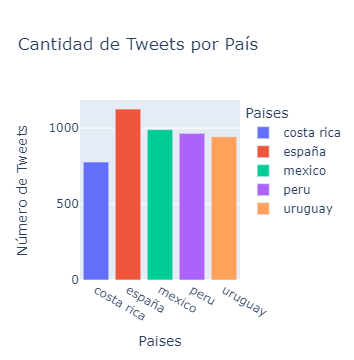

In [30]:
# Agrupar los tweets por país y contar la cantidad de tweets
tweets_por_pais = df_total.groupby('pais').size().reset_index(name='cantidad')

# Crear el gráfico de barras
fig = px.plot(tweets_por_pais, 
              x='pais', 
              y='cantidad', 
              labels={'pais': 'Paises', 'cantidad': 'Número de Tweets'},
              kind='bar',
              color='pais',
              title='Cantidad de Tweets por País')

# Mostrar el gráfico
fig.show()

### 2) Preprocesamiento de datos y limpieza de caracteres especiales

In [31]:
# Expresiones regulares para buscar y eliminar hashtags y menciones
patron_hashtag = r'#\w+'
patron_mencion = r'@\w+'

def eliminar_hashtags_menciones(texto):
    texto_sin_hashtags = re.sub(patron_hashtag, '', texto)
    texto_sin_menciones = re.sub(patron_mencion, '', texto_sin_hashtags)
    return texto_sin_menciones

df_total['texto_limpio'] = df_total['texto'].apply(eliminar_hashtags_menciones)

In [32]:
df_total.head()

id                                              texto tipo  \
0  809927403615256576  en definitiva! me quedé sin campo para ir a ta...    n   
1  796040775364710400  @dianalaa32 es una escena de uno de los docume...    p   
2  802912779854352384  qué feo es tener que terminar con alguien; y m...    n   
3  800835505717972992  oído en mcdonalds "el mejor mannequin challeng...    n   
4  791640101751230464  tengo que aceptar que me esta hundiendo el con...  neu   

         pais                                       texto_limpio  
0  costa rica  en definitiva! me quedé sin campo para ir a ta...  
1  costa rica   es una escena de uno de los documentales más ...  
2  costa rica  qué feo es tener que terminar con alguien; y m...  
3  costa rica  oído en mcdonalds "el mejor mannequin challeng...  
4  costa rica  tengo que aceptar que me esta hundiendo el con...

In [33]:
def limpiar_tweet(tweet):
    
    # Eliminar caracteres especiales
    tweet_limpio = re.sub(r'[?!,._ü)(,-]', '', tweet)

    # Eliminar tildes
    tweet_limpio = re.sub(r'[áÁ]', 'a', tweet_limpio)
    tweet_limpio = re.sub(r'[éÉ]', 'e', tweet_limpio)
    tweet_limpio = re.sub(r'[íÍ]', 'i', tweet_limpio)
    tweet_limpio = re.sub(r'[óÓ]', 'o', tweet_limpio)
    tweet_limpio = re.sub(r'[úÚ]', 'u', tweet_limpio)

    return tweet_limpio


df_total['texto_limpio'] = df_total['texto_limpio'].apply(limpiar_tweet)

In [34]:
df_total

id                                              texto  \
0     809927403615256576  en definitiva! me quedé sin campo para ir a ta...   
1     796040775364710400  @dianalaa32 es una escena de uno de los docume...   
2     802912779854352384  qué feo es tener que terminar con alguien; y m...   
3     800835505717972992  oído en mcdonalds "el mejor mannequin challeng...   
4     791640101751230464  tengo que aceptar que me esta hundiendo el con...   
...                  ...                                                ...   
4797  790619641659944961  ¿qué tipo de proyecto de diseño es tu preferid...   
4798  785432238783619072  que bueno ver a personas que te alegran aunque...   
4799  776184535771906048  @migueldobrich gracias queridísimo ! buenísimo...   
4800  795705345050025984  @gabouy pero antes si era asi es parte de nues...   
4801  782271503857553408  @abbu25 compre "hasta borinquen" por internet ...   

     tipo        pais                                       texto_limpio  
0       n  costa rica  en definitiva me quede sin campo para ir a tac...  
1       p  costa rica   es una escena de uno de los documentales mas ...  
2       n  costa rica  que feo es tener que terminar con alguien; y m...  
3       n  costa rica  oido en mcdonalds "el mejor mannequin challeng...  
4     neu  costa rica  tengo que aceptar que me esta hundiendo el con...  
...   ...         ...                                                ...  
4797  neu     uruguay  ¿que tipo de proyecto de diseño es tu preferid...  
4798    p     uruguay  que bueno ver a personas que te alegran aunque...  
4799    p     uruguay   gracias queridisimo  buenisimos la charla la ...  
4800    n     uruguay   pero antes si era asi es parte de nuestro bar...  
4801    n     uruguay   compre "hasta borinquen" por internet a ver s...  

[4802 rows x 5 columns]

In [35]:
# Expresión regular para buscar URLs
patron_url = r'http\S+|www\S+'

# Función para eliminar URLs de un texto
def eliminar_urls(texto):
    texto_sin_urls = re.sub(patron_url, '', texto)
    return texto_sin_urls


df_total['texto_limpio'] = df_total['texto_limpio'].apply(eliminar_urls)

In [36]:
df_total

id                                              texto  \
0     809927403615256576  en definitiva! me quedé sin campo para ir a ta...   
1     796040775364710400  @dianalaa32 es una escena de uno de los docume...   
2     802912779854352384  qué feo es tener que terminar con alguien; y m...   
3     800835505717972992  oído en mcdonalds "el mejor mannequin challeng...   
4     791640101751230464  tengo que aceptar que me esta hundiendo el con...   
...                  ...                                                ...   
4797  790619641659944961  ¿qué tipo de proyecto de diseño es tu preferid...   
4798  785432238783619072  que bueno ver a personas que te alegran aunque...   
4799  776184535771906048  @migueldobrich gracias queridísimo ! buenísimo...   
4800  795705345050025984  @gabouy pero antes si era asi es parte de nues...   
4801  782271503857553408  @abbu25 compre "hasta borinquen" por internet ...   

     tipo        pais                                       texto_limpio  
0       n  costa rica  en definitiva me quede sin campo para ir a tac...  
1       p  costa rica   es una escena de uno de los documentales mas ...  
2       n  costa rica  que feo es tener que terminar con alguien; y m...  
3       n  costa rica  oido en mcdonalds "el mejor mannequin challeng...  
4     neu  costa rica  tengo que aceptar que me esta hundiendo el con...  
...   ...         ...                                                ...  
4797  neu     uruguay  ¿que tipo de proyecto de diseño es tu preferid...  
4798    p     uruguay  que bueno ver a personas que te alegran aunque...  
4799    p     uruguay   gracias queridisimo  buenisimos la charla la ...  
4800    n     uruguay   pero antes si era asi es parte de nuestro bar...  
4801    n     uruguay   compre "hasta borinquen" por internet a ver s...  

[4802 rows x 5 columns]

In [37]:
# Filtrar los tweets que contengan un hashtag
tweets_con_hashtag = df_total[df_total['texto'].str.contains('#\w+', regex=True)]

print(tweets_con_hashtag['texto'])

0       en definitiva! me quedé sin campo para ir a ta...
19      en mi pueblo anda una patrulla de @fuerzapubli...
21      @espn_fdj soy de cr estudiante de periodismo m...
36      estoy viendo #bridegroom en netflix y me tiene...
127     @tvnnoticias no para esa hora. es devastador e...
                              ...                        
4606    #abrahammateoenuruguay @abrahammateomus va a s...
4637    happy birthday to the adorable #dakota feliz c...
4681    siguen con mi caída en halloween pasado loco f...
4793    #fiebre #dolorentodoelcuerpo... con #hijobello...
4797    ¿qué tipo de proyecto de diseño es tu preferid...
Name: texto, Length: 373, dtype: object


In [38]:
df_total.loc[4606]

id                                             790313900923359234
texto           #abrahammateoenuruguay @abrahammateomus va a s...
tipo                                                            n
pais                                                      uruguay
texto_limpio      va a ser 4 años que soy abrahamer y ni siqui...
Name: 4606, dtype: object

In [39]:
# Expresión regular para buscar caracteres que no sean letras ni espacios en blanco
patron_no_letras = r'[^a-zA-Z\s]+'

def eliminar_no_letras(texto):
    texto_letras = re.sub(patron_no_letras, '', texto)
    return texto_letras

df_total['texto_limpio'] = df_total['texto_limpio'].apply(eliminar_no_letras)

In [40]:
df_total

id                                              texto  \
0     809927403615256576  en definitiva! me quedé sin campo para ir a ta...   
1     796040775364710400  @dianalaa32 es una escena de uno de los docume...   
2     802912779854352384  qué feo es tener que terminar con alguien; y m...   
3     800835505717972992  oído en mcdonalds "el mejor mannequin challeng...   
4     791640101751230464  tengo que aceptar que me esta hundiendo el con...   
...                  ...                                                ...   
4797  790619641659944961  ¿qué tipo de proyecto de diseño es tu preferid...   
4798  785432238783619072  que bueno ver a personas que te alegran aunque...   
4799  776184535771906048  @migueldobrich gracias queridísimo ! buenísimo...   
4800  795705345050025984  @gabouy pero antes si era asi es parte de nues...   
4801  782271503857553408  @abbu25 compre "hasta borinquen" por internet ...   

     tipo        pais                                       texto_limpio  
0       n  costa rica  en definitiva me quede sin campo para ir a tac...  
1       p  costa rica   es una escena de uno de los documentales mas ...  
2       n  costa rica  que feo es tener que terminar con alguien y ma...  
3       n  costa rica  oido en mcdonalds el mejor mannequin challenge...  
4     neu  costa rica  tengo que aceptar que me esta hundiendo el con...  
...   ...         ...                                                ...  
4797  neu     uruguay   que tipo de proyecto de diseo es tu preferido     
4798    p     uruguay  que bueno ver a personas que te alegran aunque...  
4799    p     uruguay   gracias queridisimo  buenisimos la charla la ...  
4800    n     uruguay   pero antes si era asi es parte de nuestro bar...  
4801    n     uruguay   compre hasta borinquen por internet a ver si ...  

[4802 rows x 5 columns]

In [41]:
expresiones_risa = ['ja', 'je', 'ji', 'jo', 'ju', 'jj', 'jjj', 'jaj', 'jajaj', 'jajaaaa', 'jaajja', 'jjajajaja', 'jjaaa', 'jaja', 'jeje', 'jijiji', 'jajja', 'jajaaaj', 'jajaaajaja', 'jajajaa', 'jajajaa', 'jajajajajaja', 'juas', 'jajaaa', 'ajaja', 'jojo', 'jajajajajajajaja', 'jajaes', 'jajajajaj', 'jjaja', 'jajajajaj', 'jajajaa', 'jajajaa', 'jajajja']

# Construir el patrón de búsqueda
patron = r'\b(' + '|'.join(expresiones_risa) + r')\b'

# Reemplazar las expresiones de risa por una cadena vacía en la columna de texto
df_total['texto_limpio'] = df_total['texto_limpio'].str.replace(patron, '', case=False, regex=True)

In [42]:
df_total

id                                              texto  \
0     809927403615256576  en definitiva! me quedé sin campo para ir a ta...   
1     796040775364710400  @dianalaa32 es una escena de uno de los docume...   
2     802912779854352384  qué feo es tener que terminar con alguien; y m...   
3     800835505717972992  oído en mcdonalds "el mejor mannequin challeng...   
4     791640101751230464  tengo que aceptar que me esta hundiendo el con...   
...                  ...                                                ...   
4797  790619641659944961  ¿qué tipo de proyecto de diseño es tu preferid...   
4798  785432238783619072  que bueno ver a personas que te alegran aunque...   
4799  776184535771906048  @migueldobrich gracias queridísimo ! buenísimo...   
4800  795705345050025984  @gabouy pero antes si era asi es parte de nues...   
4801  782271503857553408  @abbu25 compre "hasta borinquen" por internet ...   

     tipo        pais                                       texto_limpio  
0       n  costa rica  en definitiva me quede sin campo para ir a tac...  
1       p  costa rica   es una escena de uno de los documentales mas ...  
2       n  costa rica  que feo es tener que terminar con alguien y ma...  
3       n  costa rica  oido en mcdonalds el mejor mannequin challenge...  
4     neu  costa rica  tengo que aceptar que me esta hundiendo el con...  
...   ...         ...                                                ...  
4797  neu     uruguay   que tipo de proyecto de diseo es tu preferido     
4798    p     uruguay  que bueno ver a personas que te alegran aunque...  
4799    p     uruguay   gracias queridisimo  buenisimos la charla la ...  
4800    n     uruguay   pero antes si era asi es parte de nuestro bar...  
4801    n     uruguay   compre hasta borinquen por internet a ver si ...  

[4802 rows x 5 columns]

In [43]:
tweets_filtrados = df_total[df_total['texto'].str.contains('j', case=False)]

# Mostrar los tweets encontrados
print(tweets_filtrados['texto'])


3       oído en mcdonalds "el mejor mannequin challeng...
6                          @itsdylanjos yo solo las cucas
8                  @_alejandrodp no estoy en la zona roja
12      @eebenitez_ jajaja es muy triste esto, pero ya...
13      @ignaciosolisw ya yo voy de vuelta, pero le de...
                              ...                        
4789    me dijo que no le había gustado no se cuantas ...
4793    #fiebre #dolorentodoelcuerpo... con #hijobello...
4795    jajajaja mejor que no me la robes igual vos em...
4796    @julianerosoy no te amargues ojala que aparezc...
4800    @gabouy pero antes si era asi es parte de nues...
Name: texto, Length: 1728, dtype: object


In [44]:
df_total.loc[4731]

id                                    762405044813783040
texto           @unbolastristes en eso tenes razon jjaaa
tipo                                                   p
pais                                             uruguay
texto_limpio                         en eso tenes razon 
Name: 4731, dtype: object

### Tokenización 

In [45]:
# Tokenizar los tweets
df_total['tokens'] = df_total['texto_limpio'].apply(word_tokenize)

In [46]:
df_total

id                                              texto  \
0     809927403615256576  en definitiva! me quedé sin campo para ir a ta...   
1     796040775364710400  @dianalaa32 es una escena de uno de los docume...   
2     802912779854352384  qué feo es tener que terminar con alguien; y m...   
3     800835505717972992  oído en mcdonalds "el mejor mannequin challeng...   
4     791640101751230464  tengo que aceptar que me esta hundiendo el con...   
...                  ...                                                ...   
4797  790619641659944961  ¿qué tipo de proyecto de diseño es tu preferid...   
4798  785432238783619072  que bueno ver a personas que te alegran aunque...   
4799  776184535771906048  @migueldobrich gracias queridísimo ! buenísimo...   
4800  795705345050025984  @gabouy pero antes si era asi es parte de nues...   
4801  782271503857553408  @abbu25 compre "hasta borinquen" por internet ...   

     tipo        pais                                       texto_limpio  \
0       n  costa rica  en definitiva me quede sin campo para ir a tac...   
1       p  costa rica   es una escena de uno de los documentales mas ...   
2       n  costa rica  que feo es tener que terminar con alguien y ma...   
3       n  costa rica  oido en mcdonalds el mejor mannequin challenge...   
4     neu  costa rica  tengo que aceptar que me esta hundiendo el con...   
...   ...         ...                                                ...   
4797  neu     uruguay   que tipo de proyecto de diseo es tu preferido      
4798    p     uruguay  que bueno ver a personas que te alegran aunque...   
4799    p     uruguay   gracias queridisimo  buenisimos la charla la ...   
4800    n     uruguay   pero antes si era asi es parte de nuestro bar...   
4801    n     uruguay   compre hasta borinquen por internet a ver si ...   

                                                 tokens  
0     [en, definitiva, me, quede, sin, campo, para, ...  
1     [es, una, escena, de, uno, de, los, documental...  
2     [que, feo, es, tener, que, terminar, con, algu...  
3     [oido, en, mcdonalds, el, mejor, mannequin, ch...  
4     [tengo, que, aceptar, que, me, esta, hundiendo...  
...                                                 ...  
4797  [que, tipo, de, proyecto, de, diseo, es, tu, p...  
4798  [que, bueno, ver, a, personas, que, te, alegra...  
4799  [gracias, queridisimo, buenisimos, la, charla,...  
4800  [pero, antes, si, era, asi, es, parte, de, nue...  
4801  [compre, hasta, borinquen, por, internet, a, v...  

[4802 rows x 6 columns]

### Eliminación de Stop Words

In [47]:
# Obtener las stop words en español
stop_words = set(sws.words('spanish'))

# Función para eliminar las stop words de una lista de tokens
def eliminar_stop_words(tokens):
    tokens_sin_stop = [token for token in tokens if token.lower() not in stop_words]
    return tokens_sin_stop

# Aplicar la función eliminar_stop_words a cada lista de tokens en la columna 'tokens'
df_total['tokens_sin_stop'] = df_total['tokens'].apply(eliminar_stop_words)

In [48]:
df_total

id                                              texto  \
0     809927403615256576  en definitiva! me quedé sin campo para ir a ta...   
1     796040775364710400  @dianalaa32 es una escena de uno de los docume...   
2     802912779854352384  qué feo es tener que terminar con alguien; y m...   
3     800835505717972992  oído en mcdonalds "el mejor mannequin challeng...   
4     791640101751230464  tengo que aceptar que me esta hundiendo el con...   
...                  ...                                                ...   
4797  790619641659944961  ¿qué tipo de proyecto de diseño es tu preferid...   
4798  785432238783619072  que bueno ver a personas que te alegran aunque...   
4799  776184535771906048  @migueldobrich gracias queridísimo ! buenísimo...   
4800  795705345050025984  @gabouy pero antes si era asi es parte de nues...   
4801  782271503857553408  @abbu25 compre "hasta borinquen" por internet ...   

     tipo        pais                                       texto_limpio  \
0       n  costa rica  en definitiva me quede sin campo para ir a tac...   
1       p  costa rica   es una escena de uno de los documentales mas ...   
2       n  costa rica  que feo es tener que terminar con alguien y ma...   
3       n  costa rica  oido en mcdonalds el mejor mannequin challenge...   
4     neu  costa rica  tengo que aceptar que me esta hundiendo el con...   
...   ...         ...                                                ...   
4797  neu     uruguay   que tipo de proyecto de diseo es tu preferido      
4798    p     uruguay  que bueno ver a personas que te alegran aunque...   
4799    p     uruguay   gracias queridisimo  buenisimos la charla la ...   
4800    n     uruguay   pero antes si era asi es parte de nuestro bar...   
4801    n     uruguay   compre hasta borinquen por internet a ver si ...   

                                                 tokens  \
0     [en, definitiva, me, quede, sin, campo, para, ...   
1     [es, una, escena, de, uno, de, los, documental...   
2     [que, feo, es, tener, que, terminar, con, algu...   
3     [oido, en, mcdonalds, el, mejor, mannequin, ch...   
4     [tengo, que, aceptar, que, me, esta, hundiendo...   
...                                                 ...   
4797  [que, tipo, de, proyecto, de, diseo, es, tu, p...   
4798  [que, bueno, ver, a, personas, que, te, alegra...   
4799  [gracias, queridisimo, buenisimos, la, charla,...   
4800  [pero, antes, si, era, asi, es, parte, de, nue...   
4801  [compre, hasta, borinquen, por, internet, a, v...   

                                        tokens_sin_stop  
0     [definitiva, quede, campo, ir, tacares, habia,...  
1     [escena, documentales, mas, respetados, natura...  
2     [feo, tener, terminar, alguien, mas, dos, pers...  
3     [oido, mcdonalds, mejor, mannequin, challenge,...  
4     [aceptar, hundiendo, consumismo, nueva, macboo...  
...                                                 ...  
4797                 [tipo, proyecto, diseo, preferido]  
4798  [bueno, ver, personas, alegran, aunque, solo, ...  
4799  [gracias, queridisimo, buenisimos, charla, esc...  
4800  [si, asi, parte, barranca, abajo, haber, perdido]  
4801  [compre, borinquen, internet, ver, si, aprende...  

[4802 rows x 7 columns]

### Lematización y Stemización

La **lematización** es un proceso más avanzado que busca reducir las palabras a su lema o forma base, que es el término canónico o diccionario de una palabra. El lema representa la raíz léxica de una palabra y se considera la forma canónica de esa palabra. Por ejemplo, el lema de las palabras "corriendo", "corre" y "correrá" es "correr".

En el proceso de **lematización**, se tiene en cuenta el contexto y la morfología de la palabra, lo que implica un análisis más profundo de la estructura gramatical. La lematización utiliza recursos lingüísticos como diccionarios y reglas gramaticales para asignar la forma base correcta a cada palabra. Como resultado, las palabras lematizadas son más legibles y representan mejor el significado original.

Por otro lado, la **stemización** es un proceso más simple y menos preciso que se basa en la eliminación de sufijos y prefijos de las palabras para obtener una forma base. La stemización se lleva a cabo aplicando reglas heurísticas o algoritmos de truncamiento, sin tener en cuenta el contexto o la morfología. El objetivo principal de la stemización es reducir las palabras a su raíz, aunque esta raíz no siempre es un lema válido. Por ejemplo, la stemización de las palabras "corriendo", "corre" y "correrá" daría como resultado "corr", que no es un lema válido.

En resumen, la lematización es un proceso más sofisticado que busca la forma base o lema de una palabra teniendo en cuenta el contexto y la morfología, mientras que la stemización es un proceso más simple que elimina sufijos y prefijos sin tener en cuenta el contexto. La lematización produce resultados más precisos y legibles, mientras que la stemización es más rápida pero puede generar raíces que no son lemas válidos. 

In [49]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Esteban\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [50]:
# Inicializar el stemmer y el lematizador
stemmer = SnowballStemmer('spanish')
lemmatizer = WordNetLemmatizer()

# Función para realizar el stemming 
def stem_tokens(tokens):
    tokens_stemmed = [stemmer.stem(token) for token in tokens]
    return tokens_stemmed

# Función para realizar la lematización 
def lemmatize_tokens(tokens):
    tokens_lemmatized = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
    return tokens_lemmatized

# Función auxiliar para obtener la categoría gramatical de un token para la lematización
def get_wordnet_pos(token):
    tag = nltk.pos_tag([token])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)

df_total['tokens_stemmed'] = df_total['tokens_sin_stop'].apply(stem_tokens)


df_total['tokens_lemmatized'] = df_total['tokens_sin_stop'].apply(lemmatize_tokens)

In [51]:
df_total

id                                              texto  \
0     809927403615256576  en definitiva! me quedé sin campo para ir a ta...   
1     796040775364710400  @dianalaa32 es una escena de uno de los docume...   
2     802912779854352384  qué feo es tener que terminar con alguien; y m...   
3     800835505717972992  oído en mcdonalds "el mejor mannequin challeng...   
4     791640101751230464  tengo que aceptar que me esta hundiendo el con...   
...                  ...                                                ...   
4797  790619641659944961  ¿qué tipo de proyecto de diseño es tu preferid...   
4798  785432238783619072  que bueno ver a personas que te alegran aunque...   
4799  776184535771906048  @migueldobrich gracias queridísimo ! buenísimo...   
4800  795705345050025984  @gabouy pero antes si era asi es parte de nues...   
4801  782271503857553408  @abbu25 compre "hasta borinquen" por internet ...   

     tipo        pais                                       texto_limpio  \
0       n  costa rica  en definitiva me quede sin campo para ir a tac...   
1       p  costa rica   es una escena de uno de los documentales mas ...   
2       n  costa rica  que feo es tener que terminar con alguien y ma...   
3       n  costa rica  oido en mcdonalds el mejor mannequin challenge...   
4     neu  costa rica  tengo que aceptar que me esta hundiendo el con...   
...   ...         ...                                                ...   
4797  neu     uruguay   que tipo de proyecto de diseo es tu preferido      
4798    p     uruguay  que bueno ver a personas que te alegran aunque...   
4799    p     uruguay   gracias queridisimo  buenisimos la charla la ...   
4800    n     uruguay   pero antes si era asi es parte de nuestro bar...   
4801    n     uruguay   compre hasta borinquen por internet a ver si ...   

                                                 tokens  \
0     [en, definitiva, me, quede, sin, campo, para, ...   
1     [es, una, escena, de, uno, de, los, documental...   
2     [que, feo, es, tener, que, terminar, con, algu...   
3     [oido, en, mcdonalds, el, mejor, mannequin, ch...   
4     [tengo, que, aceptar, que, me, esta, hundiendo...   
...                                                 ...   
4797  [que, tipo, de, proyecto, de, diseo, es, tu, p...   
4798  [que, bueno, ver, a, personas, que, te, alegra...   
4799  [gracias, queridisimo, buenisimos, la, charla,...   
4800  [pero, antes, si, era, asi, es, parte, de, nue...   
4801  [compre, hasta, borinquen, por, internet, a, v...   

                                        tokens_sin_stop  \
0     [definitiva, quede, campo, ir, tacares, habia,...   
1     [escena, documentales, mas, respetados, natura...   
2     [feo, tener, terminar, alguien, mas, dos, pers...   
3     [oido, mcdonalds, mejor, mannequin, challenge,...   
4     [aceptar, hundiendo, consumismo, nueva, macboo...   
...                                                 ...   
4797                 [tipo, proyecto, diseo, preferido]   
4798  [bueno, ver, personas, alegran, aunque, solo, ...   
4799  [gracias, queridisimo, buenisimos, charla, esc...   
4800  [si, asi, parte, barranca, abajo, haber, perdido]   
4801  [compre, borinquen, internet, ver, si, aprende...   

                                         tokens_stemmed  \
0     [definit, qued, camp, ir, tacar, habi, mentali...   
1     [escen, documental, mas, respet, naturalez, pl...   
2     [feo, ten, termin, algui, mas, dos, person, au...   
3     [oid, mcdonalds, mejor, mannequin, challeng, v...   
4     [acept, hund, consum, nuev, macbook, pro, gopr...   
...                                                 ...   
4797                       [tip, proyect, dise, prefer]   
4798      [buen, ver, person, alegr, aunqu, sol, minut]   
4799  [graci, queridisim, buenis, charl, escuch, tar...   
4800          [si, asi, part, barranc, abaj, hab, perd]   
4801  [compr, borinqu, internet, ver, si, aprend, po...   

                                 

### 3) Técnicas de Clustering 

#### K-Means

In [52]:
df_total['texto_lemmatized'] = df_total['tokens_lemmatized'].apply(lambda tokens: ' '.join(tokens))

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_total['texto_lemmatized'])

num_clusters = 4  # Número de clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

df_total['cluster'] = kmeans.labels_

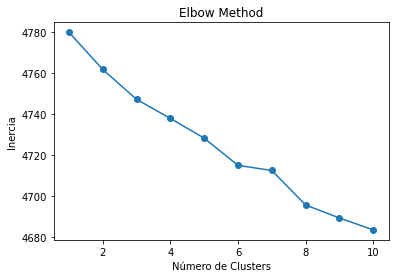

In [53]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Elbow Method')
plt.show()


In [54]:
clusters = kmeans.labels_.tolist()

tweets = {'Tweet': df_total['texto_lemmatized'].tolist(), 'Cluster': clusters}
frame = pd.DataFrame(tweets, index = [clusters])
frame.sample(10)

Tweet  Cluster
1  galleta bonita feliz cumpleaos mejor maknae mundo        1
7  amor infinito ser humano traiga desayunito mue...        7
7  acuerdense hecho mexico mexicano solo queda su...        7
7                creo unica nunca gano entrada jaque        7
9   gobierno venezolano usando ma disney pluto goofy        9
4    quiero hacerle especial david vea sonria ocurre        4
1  simple mejor arriesgarse q consuma q disfrute ...        1
7                             imeldos navideos epoca        7
7  pasado carlos roberto larga lista amigo gente ...        7
7  miraba acc solo miraba vez combo emocionada ne...        7

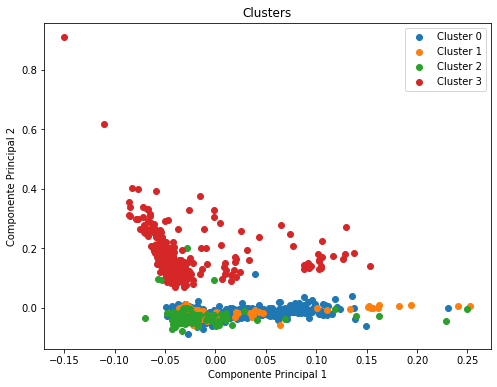

In [55]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

df_total['cluster'] = kmeans.labels_

plt.figure(figsize=(8, 6))
for cluster_label in range(num_clusters):
    cluster_points = X_pca[df_total['cluster'] == cluster_label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_label}')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters')
plt.legend()
plt.show()


In [56]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_total['texto_lemmatized'])

num_clusters = 6  # Número de clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

df_total['cluster'] = kmeans.labels_

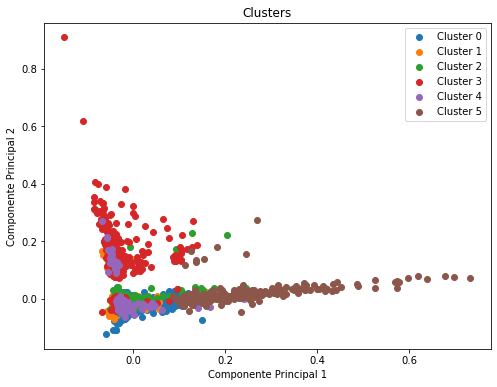

In [57]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

df_total['cluster'] = kmeans.labels_

plt.figure(figsize=(8, 6))
for cluster_label in range(num_clusters):
    cluster_points = X_pca[df_total['cluster'] == cluster_label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_label}')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters')
plt.legend()
plt.show()

In [58]:
df_total

id                                              texto  \
0     809927403615256576  en definitiva! me quedé sin campo para ir a ta...   
1     796040775364710400  @dianalaa32 es una escena de uno de los docume...   
2     802912779854352384  qué feo es tener que terminar con alguien; y m...   
3     800835505717972992  oído en mcdonalds "el mejor mannequin challeng...   
4     791640101751230464  tengo que aceptar que me esta hundiendo el con...   
...                  ...                                                ...   
4797  790619641659944961  ¿qué tipo de proyecto de diseño es tu preferid...   
4798  785432238783619072  que bueno ver a personas que te alegran aunque...   
4799  776184535771906048  @migueldobrich gracias queridísimo ! buenísimo...   
4800  795705345050025984  @gabouy pero antes si era asi es parte de nues...   
4801  782271503857553408  @abbu25 compre "hasta borinquen" por internet ...   

     tipo        pais                                       texto_limpio  \
0       n  costa rica  en definitiva me quede sin campo para ir a tac...   
1       p  costa rica   es una escena de uno de los documentales mas ...   
2       n  costa rica  que feo es tener que terminar con alguien y ma...   
3       n  costa rica  oido en mcdonalds el mejor mannequin challenge...   
4     neu  costa rica  tengo que aceptar que me esta hundiendo el con...   
...   ...         ...                                                ...   
4797  neu     uruguay   que tipo de proyecto de diseo es tu preferido      
4798    p     uruguay  que bueno ver a personas que te alegran aunque...   
4799    p     uruguay   gracias queridisimo  buenisimos la charla la ...   
4800    n     uruguay   pero antes si era asi es parte de nuestro bar...   
4801    n     uruguay   compre hasta borinquen por internet a ver si ...   

                                                 tokens  \
0     [en, definitiva, me, quede, sin, campo, para, ...   
1     [es, una, escena, de, uno, de, los, documental...   
2     [que, feo, es, tener, que, terminar, con, algu...   
3     [oido, en, mcdonalds, el, mejor, mannequin, ch...   
4     [tengo, que, aceptar, que, me, esta, hundiendo...   
...                                                 ...   
4797  [que, tipo, de, proyecto, de, diseo, es, tu, p...   
4798  [que, bueno, ver, a, personas, que, te, alegra...   
4799  [gracias, queridisimo, buenisimos, la, charla,...   
4800  [pero, antes, si, era, asi, es, parte, de, nue...   
4801  [compre, hasta, borinquen, por, internet, a, v...   

                                        tokens_sin_stop  \
0     [definitiva, quede, campo, ir, tacares, habia,...   
1     [escena, documentales, mas, respetados, natura...   
2     [feo, tener, terminar, alguien, mas, dos, pers...   
3     [oido, mcdonalds, mejor, mannequin, challenge,...   
4     [aceptar, hundiendo, consumismo, nueva, macboo...   
...                                                 ...   
4797                 [tipo, proyecto, diseo, preferido]   
4798  [bueno, ver, personas, alegran, aunque, solo, ...   
4799  [gracias, queridisimo, buenisimos, charla, esc...   
4800  [si, asi, parte, barranca, abajo, haber, perdido]   
4801  [compre, borinquen, internet, ver, si, aprende...   

                                         tokens_stemmed  \
0     [definit, qued, camp, ir, tacar, habi, mentali...   
1     [escen, documental, mas, respet, naturalez, pl...   
2     [feo, ten, termin, algui, mas, dos, person, au...   
3     [oid, mcdonalds, mejor, mannequin, challeng, v...   
4     [acept, hund, consum, nuev, macbook, pro, gopr...   
...                                                 ...   
4797                       [tip, proyect, dise, prefer]   
4798      [buen, ver, person, alegr, aunqu, sol, minut]   
4799  [graci, queridisim, buenis, charl, escuch, tar...   
4800          [si, asi, part, barranc, abaj, hab, perd]   
4801  [compr, borinqu, internet, ver, si, aprend, po...   

                                 

In [59]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_total['texto_lemmatized'])

num_clusters = 3  # Número de clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

df_total['cluster'] = kmeans.labels_

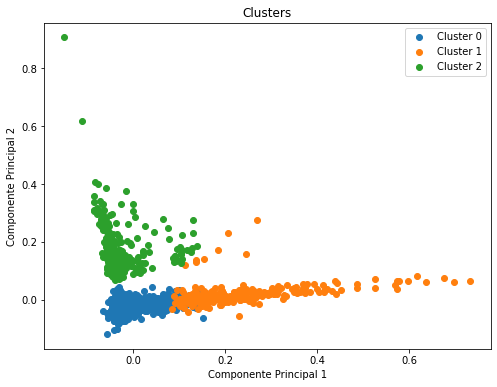

In [60]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

df_total['cluster'] = kmeans.labels_

plt.figure(figsize=(8, 6))
for cluster_label in range(num_clusters):
    cluster_points = X_pca[df_total['cluster'] == cluster_label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_label}')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters')
plt.legend()
plt.show()

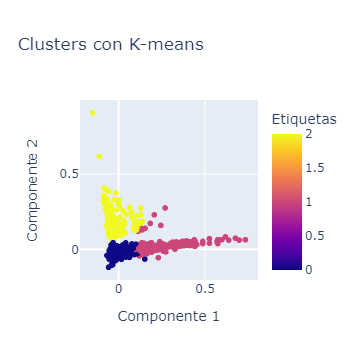

In [61]:
import plotly.express as px
# Crear DataFrame con los datos y las etiquetas
df = pd.DataFrame({'Componente 1': X_pca[:, 0], 'Componente 2': X_pca[:, 1], 'Etiquetas': df_total['cluster']})

# Graficar los clusters con plotly express
fig = px.scatter(df, x='Componente 1', y='Componente 2', color='Etiquetas',
                 labels={'Componente 1': 'Componente 1', 'Componente 2': 'Componente 2'},
                 title='Clusters con K-means')

# Mostrar la figura
fig.show()

In [62]:
df_total

id                                              texto  \
0     809927403615256576  en definitiva! me quedé sin campo para ir a ta...   
1     796040775364710400  @dianalaa32 es una escena de uno de los docume...   
2     802912779854352384  qué feo es tener que terminar con alguien; y m...   
3     800835505717972992  oído en mcdonalds "el mejor mannequin challeng...   
4     791640101751230464  tengo que aceptar que me esta hundiendo el con...   
...                  ...                                                ...   
4797  790619641659944961  ¿qué tipo de proyecto de diseño es tu preferid...   
4798  785432238783619072  que bueno ver a personas que te alegran aunque...   
4799  776184535771906048  @migueldobrich gracias queridísimo ! buenísimo...   
4800  795705345050025984  @gabouy pero antes si era asi es parte de nues...   
4801  782271503857553408  @abbu25 compre "hasta borinquen" por internet ...   

     tipo        pais                                       texto_limpio  \
0       n  costa rica  en definitiva me quede sin campo para ir a tac...   
1       p  costa rica   es una escena de uno de los documentales mas ...   
2       n  costa rica  que feo es tener que terminar con alguien y ma...   
3       n  costa rica  oido en mcdonalds el mejor mannequin challenge...   
4     neu  costa rica  tengo que aceptar que me esta hundiendo el con...   
...   ...         ...                                                ...   
4797  neu     uruguay   que tipo de proyecto de diseo es tu preferido      
4798    p     uruguay  que bueno ver a personas que te alegran aunque...   
4799    p     uruguay   gracias queridisimo  buenisimos la charla la ...   
4800    n     uruguay   pero antes si era asi es parte de nuestro bar...   
4801    n     uruguay   compre hasta borinquen por internet a ver si ...   

                                                 tokens  \
0     [en, definitiva, me, quede, sin, campo, para, ...   
1     [es, una, escena, de, uno, de, los, documental...   
2     [que, feo, es, tener, que, terminar, con, algu...   
3     [oido, en, mcdonalds, el, mejor, mannequin, ch...   
4     [tengo, que, aceptar, que, me, esta, hundiendo...   
...                                                 ...   
4797  [que, tipo, de, proyecto, de, diseo, es, tu, p...   
4798  [que, bueno, ver, a, personas, que, te, alegra...   
4799  [gracias, queridisimo, buenisimos, la, charla,...   
4800  [pero, antes, si, era, asi, es, parte, de, nue...   
4801  [compre, hasta, borinquen, por, internet, a, v...   

                                        tokens_sin_stop  \
0     [definitiva, quede, campo, ir, tacares, habia,...   
1     [escena, documentales, mas, respetados, natura...   
2     [feo, tener, terminar, alguien, mas, dos, pers...   
3     [oido, mcdonalds, mejor, mannequin, challenge,...   
4     [aceptar, hundiendo, consumismo, nueva, macboo...   
...                                                 ...   
4797                 [tipo, proyecto, diseo, preferido]   
4798  [bueno, ver, personas, alegran, aunque, solo, ...   
4799  [gracias, queridisimo, buenisimos, charla, esc...   
4800  [si, asi, parte, barranca, abajo, haber, perdido]   
4801  [compre, borinquen, internet, ver, si, aprende...   

                                         tokens_stemmed  \
0     [definit, qued, camp, ir, tacar, habi, mentali...   
1     [escen, documental, mas, respet, naturalez, pl...   
2     [feo, ten, termin, algui, mas, dos, person, au...   
3     [oid, mcdonalds, mejor, mannequin, challeng, v...   
4     [acept, hund, consum, nuev, macbook, pro, gopr...   
...                                                 ...   
4797                       [tip, proyect, dise, prefer]   
4798      [buen, ver, person, alegr, aunqu, sol, minut]   
4799  [graci, queridisim, buenis, charl, escuch, tar...   
4800          [si, asi, part, barranc, abaj, hab, perd]   
4801  [compr, borinqu, internet, ver, si, aprend, po...   

                                 

In [92]:
for cluster in range(num_clusters):
    clusters_ = df_total[df_total['cluster'] == cluster]
    print(f'Cluster {cluster}:')
    print('Ejemplo de comentarios:')
    sample_tweets = clusters_.sample(min(5, len(clusters_)))  # Obtener una muestra de hasta 5 tweets
    for index, tweet in sample_tweets.iterrows():
        print(tweet['texto'])
    print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')

Cluster 0:
Ejemplo de comentarios:
@ias25viki les tengo alergia (?) ah hacia problema por todo
eso de echar de menos tu propia casa son leyendas urbanas 
en mi vida siempre pasan personas, de esas que valen oro, pero nunca vas a tener. de alguna manera es muy lindo ilusionarse
hace rato debí de haberme levantado para ir al gym
ocupo que den un secret passcode para que las beliebers compren las entradas antes y después las que sobran las ponen a la venta normal
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Cluster 1:
Ejemplo de comentarios:
algún día seré puntual, hoy no es el día
@swareles, ¡muchas gracias, carla! de momento han caído tres, así que no empieza mal el día 
hoy amaneció nublado y con frío! el día está para no salir, ver pelis y comer pizza! bonito viernes y buen fin de semana para todos!
lo peor de mi cumple es que ese día empiezo mis clases de nuevo!!
día poco productivo el de hoy 
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Cluster 2:
Ejemplo de comentarios:
he probado una nueva espuma para el

In [89]:
for cluster in range(num_clusters): 
    clusters_ = df_total[df_total['cluster'] == cluster]
    print(f'Cluster{cluster}:')
    print('Número de comentarios:', len(clusters_))
    print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')


Cluster0:
Número de comentarios: 3980
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Cluster1:
Número de comentarios: 329
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Cluster2:
Número de comentarios: 493
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


#### Agglomerative (Agrupamiento Jerárquico Aglomerativo)

In [63]:
num_clusters = 4  # Número de clusters 
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
agg_labels = agg_clustering.fit_predict(X.toarray())

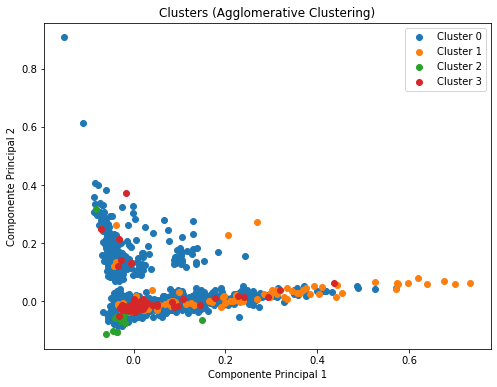

In [64]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(8, 6))
for cluster_label in range(num_clusters):
    cluster_points = X_pca[agg_labels == cluster_label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_label}')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters (Agglomerative Clustering)')
plt.legend()
plt.show()


In [65]:
num_clusters = 3  # Número de clusters 
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
agg_labels = agg_clustering.fit_predict(X.toarray())

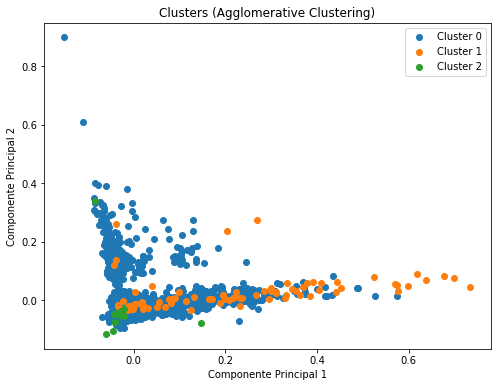

In [66]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(8, 6))
for cluster_label in range(num_clusters):
    cluster_points = X_pca[agg_labels == cluster_label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_label}')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters (Agglomerative Clustering)')
plt.legend()
plt.show()


#### HDP (Hierarchical Dirichlet Process)

In [67]:
dictionary = Dictionary(df_total.tokens_lemmatized)

corpus = [dictionary.doc2bow(doc) for doc in df_total.tokens_lemmatized]

hdp_model = HdpModel(corpus=corpus, id2word=dictionary)

topics = hdp_model.print_topics()

for topic in topics:
    print(topic)

(0, '0.001*minusvalidos + 0.001*copa + 0.001*resaltes + 0.001*amigo + 0.001*salas + 0.001*batalla + 0.001*corrigio + 0.001*basura + 0.001*canso + 0.001*ukai')
(1, '0.001*envenenados + 0.001*sacarme + 0.001*paseo + 0.001*industria + 0.001*despertar + 0.001*trabajo + 0.001*mgico + 0.001*quitaron + 0.001*restaurant + 0.001*dandote')
(2, '0.001*empiecen + 0.001*si + 0.001*reconocido + 0.001*viniste + 0.001*mochila + 0.001*esquinita + 0.001*puse + 0.001*escribirnos + 0.001*reality + 0.001*secuestrada')
(3, '0.001*republicana + 0.001*veranos + 0.001*tantas + 0.001*ahora + 0.001*ma + 0.001*apoyen + 0.001*bastian + 0.001*pelis + 0.001*burrada + 0.001*ver')
(4, '0.001*si + 0.001*estupidez + 0.001*echen + 0.001*llamandose + 0.001*ginebra + 0.001*dejala + 0.001*lindo + 0.001*mrdass + 0.001*ryan + 0.001*otzea')
(5, '0.001*view + 0.001*neel + 0.001*abiertabuee + 0.001*fujiratas + 0.001*penultimo + 0.001*compatriotas + 0.001*dije + 0.001*jamon + 0.001*conozco + 0.001*yu')
(6, '0.001*have + 0.001*ste

In [68]:
topics = hdp_model.print_topics()

for topic in topics:
    topic_num = topic[0]
    topic_words = topic[1].split('+')
    words = [word.split('*')[1].strip() for word in topic_words]
    print(f"Topic {topic_num}: {words}")

Topic 0: ['minusvalidos', 'copa', 'resaltes', 'amigo', 'salas', 'batalla', 'corrigio', 'basura', 'canso', 'ukai']
Topic 1: ['envenenados', 'sacarme', 'paseo', 'industria', 'despertar', 'trabajo', 'mgico', 'quitaron', 'restaurant', 'dandote']
Topic 2: ['empiecen', 'si', 'reconocido', 'viniste', 'mochila', 'esquinita', 'puse', 'escribirnos', 'reality', 'secuestrada']
Topic 3: ['republicana', 'veranos', 'tantas', 'ahora', 'ma', 'apoyen', 'bastian', 'pelis', 'burrada', 'ver']
Topic 4: ['si', 'estupidez', 'echen', 'llamandose', 'ginebra', 'dejala', 'lindo', 'mrdass', 'ryan', 'otzea']
Topic 5: ['view', 'neel', 'abiertabuee', 'fujiratas', 'penultimo', 'compatriotas', 'dije', 'jamon', 'conozco', 'yu']
Topic 6: ['have', 'ste', 'epn', 'campeonato', 'determinan', 'bella', 'willy', 'raquel', 'fio', 'duel']
Topic 7: ['sirven', 'revivi', 'avanzar', 'va', 'auto', 'ayy', 'clasico', 'trababa', 'periodicos', 'contestaras']
Topic 8: ['tailandesa', 'necrofilo', 'prensa', 'claroooo', 'temp', 'mantendria', 

In [69]:
dictionary = Dictionary(df_total.tokens_lemmatized)

corpus = [dictionary.doc2bow(doc) for doc in df_total.tokens_lemmatized]

hdp_model = HdpModel(corpus=corpus, id2word=dictionary)

topics = hdp_model.get_topics()

for topic_id, topic_words in enumerate(topics):
    print(f"Topic #{topic_id+1}:")
    top_words = [dictionary[word_id] for word_id in topic_words.argsort()[-10:]]
    print(top_words)


Topic #1:
['postura', 'dieron', 'recluido', 'daremos', 'visualizando', 'obrar', 'imaginarse', 'siempre', 'debas', 'asi']
Topic #2:
['partes', 'adorable', 'produccion', 'reivindicacion', 'ma', 'reciben', 'performance', 'relacionando', 'si', 'dia']
Topic #3:
['darkus', 'inactivas', 'malaya', 'caigase', 'permite', 'macbook', 'cuetes', 'excelente', 'mandar', 'soplen']
Topic #4:
['portal', 'dibuja', 'ajajajajajja', 'va', 'iran', 'tae', 'feria', 'monologos', 'restaurant', 'saludado']
Topic #5:
['futuras', 'paulina', 'poderme', 'espontaneidad', 'normal', 'crece', 'logico', 'ani', 'chiqui', 'apasiona']
Topic #6:
['ma', 'amoroso', 'ojos', 'soportarme', 'puestos', 'frustracion', 'pideselo', 'silenciar', 'diaaaas', 'gratamente']
Topic #7:
['siiiiii', 'ma', 'abrace', 'profesion', 'si', 'dinerus', 'lentoooooo', 'verse', 'diversas', 'erecto']
Topic #8:
['embole', 'pierdas', 'ole', 'dijeron', 'patz', 'relacionar', 'graciaas', 'pidas', 'just', 'matteo']
Topic #9:
['plan', 'tercera', 'vuelves', 'cangur

In [71]:
hdp_topics = hdp_model.print_topics(num_topics=10, num_words=15)

for topic_idx, topic in hdp_topics:
    topic_words = topic.split('+')
    topic_words = [word.split('*')[1].strip().replace('"', '') for word in topic_words]
    topic_words = ' '.join(topic_words)
    print(f"Topic #{topic_idx+1}: {topic_words}")

Topic #1: asi debas siempre imaginarse obrar visualizando daremos recluido dieron postura adolescente si empate frustrante dia
Topic #2: dia si relacionando performance reciben ma reivindicacion produccion adorable partes cobra hermoso esquina persona sutilmente
Topic #3: soplen mandar excelente cuetes macbook permite caigase malaya inactivas darkus we vacia tolerdo aburrimiento zaragoza
Topic #4: saludado restaurant monologos feria tae iran va ajajajajajja dibuja portal aguanta admiro combinacion inclito disney
Topic #5: apasiona chiqui ani logico crece normal espontaneidad poderme paulina futuras balistico leer come genio ultima
Topic #6: gratamente diaaaas silenciar pideselo frustracion puestos soportarme ojos amoroso ma salud man cabe angosto villancicos
Topic #7: erecto diversas verse lentoooooo dinerus si profesion abrace ma siiiiii veneno cajero hora dia busque
Topic #8: matteo just pidas graciaas relacionar patz dijeron ole pierdas embole pusieron egresado entiendan armado luis

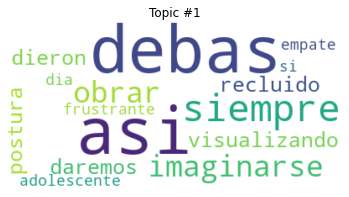

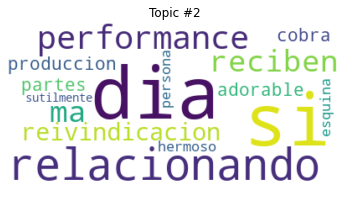

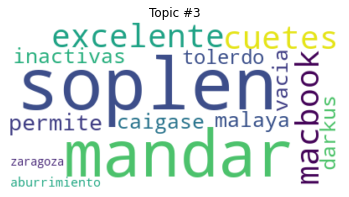

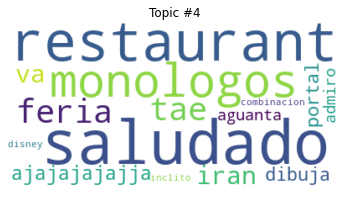

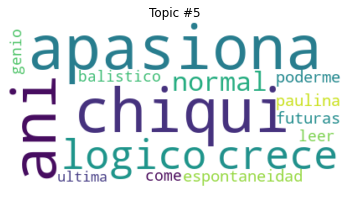

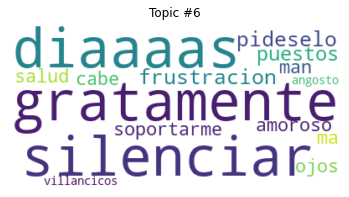

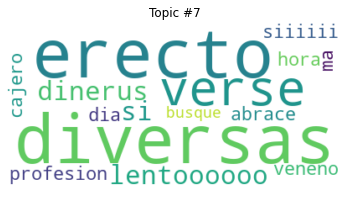

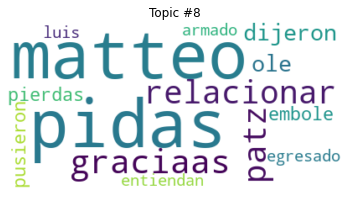

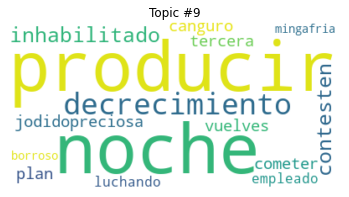

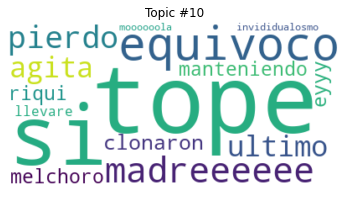

In [74]:
num_topics = 10

for topic_idx, topic in enumerate(hdp_model.show_topics(num_topics=num_topics, num_words=15, formatted=False)):
    topic_words = [word[0] for word in topic[1]]
    wordcloud = WordCloud(background_color='white').generate(' '.join(topic_words))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Topic #{topic_idx+1}")
    plt.axis("off")
    plt.show()

#### NMF (Factorización Matricial No Negativa)

In [75]:
textos = [" ".join(tokens) for tokens in df_total.tokens_lemmatized]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(textos)

num_topics = 5  # Número de temas 
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(X)

feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf_model.components_):
    print(f"Topic #{topic_idx+1}:")
    top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]
    print(top_words)

Topic #1:
['ma', 'quiero', 'mejor', 'solo', 'bueno', 'siempre', 'ser', 'asi', 'tan', 'ao']
Topic #2:
['dia', 'buen', 'buenos', 'feliz', 'lindo', 'bonito', 'ultimo', 'hoy', 'largo', 'besitos']
Topic #3:
['si', 'pues', 'voy', 'asi', 'feo', 'creo', 'seria', 'mismo', 'gente', 'ver']
Topic #4:
['gracias', 'feliz', 'muchas', 'buena', 'abrazo', 'navidad', 'ser', 'igual', 'fuerte', 'hola']
Topic #5:
['hoy', 'triste', 'veo', 'verdad', 'creo', 'lindo', 'siento', 're', 'serum', 'hermosa']


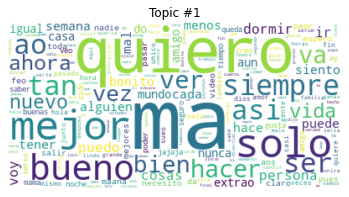

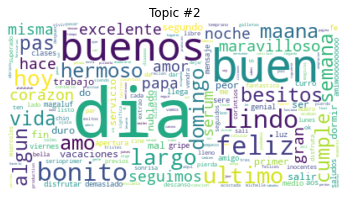

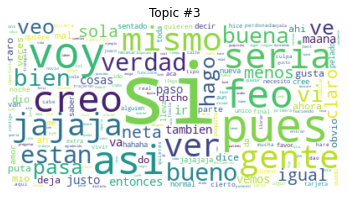

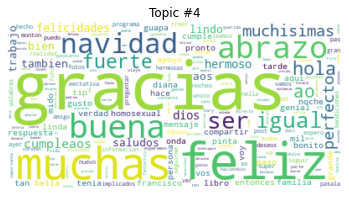

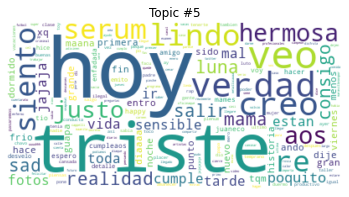

In [77]:
num_topics = 5

for topic_idx, topic in enumerate(nmf_model.components_):
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(dict(zip(feature_names, topic)))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Topic #{topic_idx+1}")
    plt.axis("off")
    plt.show()

#### LDA (Latent Dirichlet Allocation)

In [76]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(textos)


num_topics = 5  # Número de temas 
plsa_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
plsa_model.fit(X)


feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(plsa_model.components_):
    print(f"Topic #{topic_idx+1}:")
    top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]
    print(top_words)


Topic #1:
['si', 'quiero', 'hacer', 'voy', 'ahora', 'ma', 'solo', 'asi', 'tan', 'feliz']
Topic #2:
['ma', 'siempre', 'triste', 'hola', 'igual', 'asi', 'si', 'gente', 'veo', 'mejor']
Topic #3:
['dia', 'si', 'gracias', 'ser', 'buen', 'feliz', 'bueno', 'va', 'hoy', 'bien']
Topic #4:
['si', 'mejor', 'hoy', 'asi', 'extrao', 'bien', 'estan', 'vida', 'ao', 'dia']
Topic #5:
['ma', 'solo', 'si', 'mejor', 'bueno', 'tan', 'hace', 'ver', 'mal', 'cada']


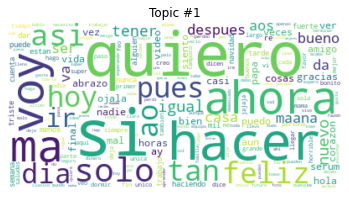

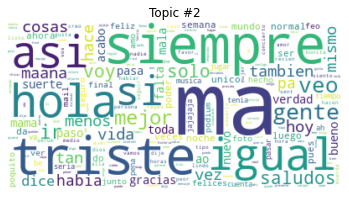

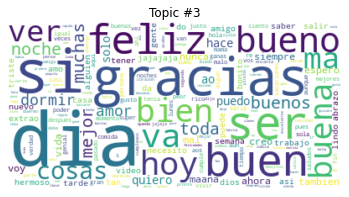

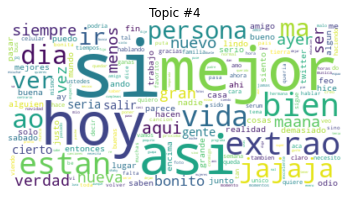

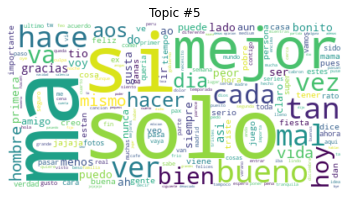

In [78]:
from wordcloud import WordCloud

num_topics = 10

for topic_idx, topic in enumerate(plsa_model.components_):
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(dict(zip(feature_names, topic)))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Topic #{topic_idx+1}")
    plt.axis("off")
    plt.show()

#### LSI (Latent Semantic Indexing)

In [79]:
dictionary = Dictionary(df_total.tokens_lemmatized)
corpus = [dictionary.doc2bow(doc) for doc in df_total.tokens_lemmatized]
tfidf_model = TfidfModel(corpus)
corpus_tfidf = tfidf_model[corpus]
num_topics = 5  # Número de temas
lsi_model = LsiModel(corpus_tfidf, id2word=dictionary, num_topics=num_topics)

topics = lsi_model.print_topics(num_topics=-1, num_words=10)

for topic in topics:
    topic_num = topic[0]
    topic_words = topic[1].split('+')
    words = [word.split('*')[1].strip() for word in topic_words]
    print(f"Topic {topic_num}: {words}")

Topic 0: ['"dia"', '"si"', '"hoy"', '"ma"', '"feliz"', '"buen"', '"gracias"', '"mejor"', '"ser"', '"asi"']
Topic 1: ['"dia"', '"buen"', '"si"', '"hoy"', '"buenos"', '"ma"', '"quiero"', '"bueno"', '"mejor"', '"solo"']
Topic 2: ['"triste"', '"gracias"', '"hoy"', '"feliz"', '"muchas"', '"ma"', '"si"', '"buena"', '"solo"', '"abrazo"']
Topic 3: ['"si"', '"triste"', '"feliz"', '"gracias"', '"ao"', '"ser"', '"tan"', '"muchas"', '"navidad"', '"asi"']
Topic 4: ['"si"', '"gracias"', '"triste"', '"mejor"', '"ma"', '"muchas"', '"ao"', '"siempre"', '"hoy"', '"quiero"']


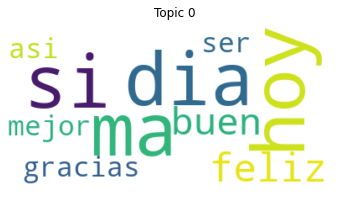

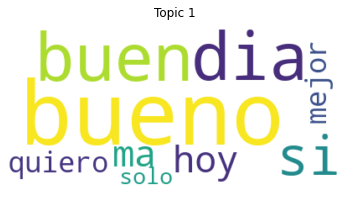

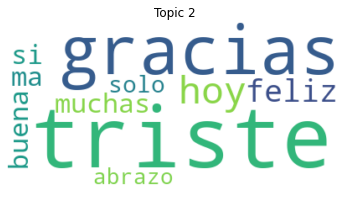

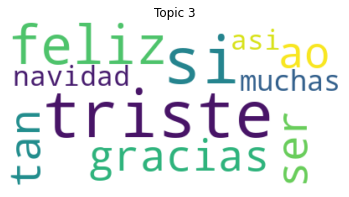

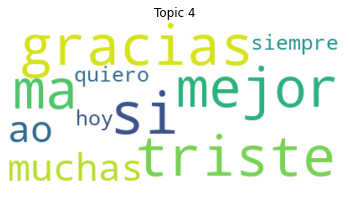

In [80]:
# Generar nube de palabras por tópico
for topic_num, topic_words in lsi_model.print_topics(num_topics=-1, num_words=10):
    words = [word.split('*')[1].strip() for word in topic_words.split('+')]
    wordcloud = WordCloud(background_color='white').generate(' '.join(words))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Topic {topic_num}")
    plt.axis("off")
    plt.show()

### 4) Métricas


#### K-Means

In [81]:
# Calcular el índice de silueta (una medida de la coherencia de los clústeres)
silhouette_avg = silhouette_score(X, kmeans.labels_)

print("Índice de silueta:", silhouette_avg)

Índice de silueta: 0.036711383045224366


#### Agglomerative

In [82]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, pairwise_distances

# Calcular la métrica de silueta
silhouette_avg = silhouette_score(X, agg_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: -0.18154184155887862


##### Coherence HDP

In [ ]:
# Crear el diccionario y el corpus
dictionary = Dictionary(df_total.tokens_lemmatized)
corpus = [dictionary.doc2bow(doc) for doc in df_total.tokens_lemmatized]

# Entrenar el modelo HDP
hdp_model = HdpModel(corpus, id2word=dictionary)

# Obtener los temas y sus palabras principales
topics = hdp_model.print_topics(num_topics=10, num_words=15)

# Crear una lista de listas de palabras para cada tema
topic_words = [[word.split('*')[1].strip() for word in topic[1].split('+')] for topic in topics]

# Crear el objeto de coherencia del modelo
coherence_model = CoherenceModel(model=hdp_model, texts=df_total.tokens_lemmatized, dictionary=dictionary, coherence='c_v')

# Calcular la coherencia del modelo HDP
coherence_score = coherence_model.get_coherence()

print(f"Coherence Score: {coherence_score}")

Coherence Score: 0.7428404126736393


#### Coherence NMF

In [ ]:
# Crear el vectorizador y ajustarlo al corpus
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(textos)

# Entrenar el modelo NMF
num_topics = 5
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(X)

# Obtener los términos y las características del vectorizador
feature_names = vectorizer.get_feature_names()
corpus = X.toarray()

# Calcular la coherencia de pares
coherence_score = 0.0
topic_combinations = itertools.combinations(range(num_topics), 2)
for i, j in topic_combinations:
    topic_i = nmf_model.components_[i]
    topic_j = nmf_model.components_[j]
    similarity_matrix = cosine_similarity([topic_i], [topic_j])
    coherence_score += similarity_matrix.sum()

coherence_score /= len(list(topic_combinations))

print(f"Coherence Score: {coherence_score}")

Coherence Score: inf


un valor de "inf" (infinito) como resultado de la coherencia, generalmente significa que no hay suficiente información en los documentos o en los temas para calcular una medida de coherencia significativa.

La coherencia se calcula comparando la similitud de las palabras dentro de un mismo tema y la similitud entre los diferentes temas. Si hay poca variabilidad en las palabras o si los documentos no contienen suficiente información para formar temas coherentes, es posible que se obtenga un valor de "inf".

#### Coherence LDA

In [85]:
# Crear el diccionario y el corpus
dictionary = Dictionary(df_total.tokens_lemmatized)
corpus = [dictionary.doc2bow(doc) for doc in df_total.tokens_lemmatized]

# Entrenar el modelo LDA
num_topics = 5
lda_model = LdaModel(corpus, id2word=dictionary, num_topics=num_topics)

# Calcular la coherencia del modelo
coherence_model = CoherenceModel(model=lda_model, texts=df_total.tokens_lemmatized, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print(f"Coherence Score: {coherence_score}")

Coherence Score: 0.2535667018189258


#### Coherence LSI

In [86]:
# Crear el diccionario y el corpus
dictionary = Dictionary(df_total.tokens_lemmatized)
corpus = [dictionary.doc2bow(doc) for doc in df_total.tokens_lemmatized]

# Entrenar el modelo LSI
num_topics = 5
lsi_model = LsiModel(corpus, id2word=dictionary, num_topics=num_topics)

# Calcular la coherencia del modelo
coherence_model = CoherenceModel(model=lsi_model, texts=df_total.tokens_lemmatized, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print(f"Coherence Score: {coherence_score}")

Coherence Score: 0.2873950369334387


### 5), 6), y 7) realizados en el otro notebook.

### 8) Fortalezas y debilidades y breve descripcion de cada modelo.


Breve descripción de cada uno de los modelos mencionados y sus fortalezas y debilidades:

1. **HDP (Hierarchical Dirichlet Process)**:
El HDP es un modelo generativo no paramétrico utilizado en el campo del procesamiento del lenguaje natural. Se utiliza para descubrir automáticamente temas latentes en un conjunto de documentos sin tener que especificar de antemano el número de temas. El HDP utiliza la distribución de Dirichlet como base para modelar la distribución de palabras en los documentos.

Fortalezas:
- Permite descubrir automáticamente el número de temas en los datos sin tener que especificarlo de antemano.
- Manejo eficiente de documentos con tamaños y estructuras variables.
- Modelado más flexible y escalable en comparación con otros enfoques.

Debilidades:
- Requiere una cantidad significativa de datos para un rendimiento óptimo.
- Puede ser computacionalmente costoso en conjuntos de datos grandes.
- La interpretación de los temas puede ser más compleja debido a la falta de control explícito sobre el número de temas.

Algunas situaciones en las que el HDP puede ofrecer buenos resultados incluyen:

- Análisis de textos con una gran variedad de temas y una estructura jerárquica.
- Clasificación de documentos en tópicos con una distribución no uniforme.
- Descubrimiento de tópicos emergentes en flujos de texto en tiempo real.
- Segmentación de imágenes y agrupación de secuencias.


2. **LSI (Latent Semantic Indexing)**:
LSI es una técnica de reducción de dimensionalidad utilizada para analizar y recuperar información semántica oculta en un conjunto de documentos. Aplica descomposición de valores singulares (SVD) para construir una representación de baja dimensionalidad de los documentos y las palabras.

Fortalezas:
- Permite encontrar relaciones semánticas entre palabras y documentos.
- Reduce la dimensionalidad de los datos, lo que puede mejorar la eficiencia computacional.
- Ayuda en la recuperación de información y recomendación de contenido relacionado.

Debilidades:
- La interpretación de los conceptos latentes puede ser difícil debido a la naturaleza no supervisada del modelo.
- No captura relaciones contextuales y dependencias secuenciales en el texto.
- No es tan efectivo para datos no textuales o con estructuras diferentes.
- Puede haber pérdida de información semántica durante la reducción de dimensionalidad.
- Puede no funcionar bien con conjuntos de datos muy pequeños.

LSI puede ofrecer buenos resultados son:

- Se utiliza principalmente en el análisis de texto y la recuperación de información, la búsqueda de similitud semántica y la reducción de la dimensionalidad en conjuntos de datos de texto.
- Búsqueda de información en grandes colecciones de texto.
- Agrupación de documentos con términos similares.
- Recomendación de contenido relacionado en sistemas de recomendación.

3. **LDA (Latent Dirichlet Allocation)**:
LDA es un modelo generativo utilizado para modelar conjuntos de documentos y descubrir temas subyacentes. Asigna probabilidades a las palabras en función de la distribución de temas en los documentos y la distribución de palabras en los temas.

Fortalezas:
- Permite descubrir temas subyacentes en conjuntos de documentos.
- Proporciona una representación probabilística de los documentos y las palabras.
- Se puede aplicar a grandes volúmenes de datos y tiene implementaciones eficientes.

Debilidades:
- Requiere especificar el número de temas de antemano.
- No tiene en cuenta la estructura secuencial de los documentos y el orden de las palabras.

Algunas situaciones en las que LDA puede obtener buenos resultados son:

- e utiliza principalmente en el análisis de texto y la recuperación de información, 
- Análisis de sentimientos en redes sociales.
- Agrupación de documentos temáticamente relacionados.
- Recomendación de contenido personalizado basado en los tópicos de los documentos.

4. **K-means**:
K-means es un algoritmo de agrupamiento utilizado para dividir un conjunto de datos en k grupos o clusters. Asigna los puntos de datos al grupo más cercano en función de la distancia euclidiana.

Fortalezas:
- Es fácil de entender y de implementar.
- Funciona bien con grandes volúmenes de datos.
- Eficiente computacionalmente.

Debilidades:
- Requiere especificar el número de clusters (k) de antemano.
- Es sensible a los valores iniciales de los centroides y puede converger a óptimos locales.

Algunas situaciones y tipos de datos en los que K-means puede ofrecer buenos resultados son:

- Datos numéricos: K-means funciona bien con conjuntos de datos numéricos en los que las características pueden ser representadas como valores numéricos y se pueden calcular distancias entre ellos.
- Estructura esférica: K-means tiende a funcionar mejor cuando los grupos tienen una forma esférica y están bien separados.
- Número de grupos conocido: K-means requiere especificar el número de grupos (k) de antemano, por lo que es adecuado cuando se conoce el número deseado de grupos en los datos.

5. **Agglomerative (Agrupamiento Jerárquico Aglomerativo)**:
Agglomerative Clustering es un algoritmo de agrupamiento jerárquico que construye una estructura de árbol (dendrograma) para representar las relaciones de agrupamiento entre los objetos. Comienza con cada punto de datos como un cluster individual y luego fusiona los clusters más cercanos en cada paso.

Fortalezas:
- No requiere especificar el número de clusters de antemano.
- Proporciona una estructura jerárquica de clusters.
- Puede ser útil para visualizar y explorar relaciones entre clusters.

Debilidades:
- Puede ser computacionalmente costoso en grandes conjuntos de datos.
- No es escalable para conjuntos de datos muy grandes.
- La elección de la métrica de distancia y el criterio de fusión puede afectar los resultados.

Algunas situaciones y tipos de datos en los que Agglomerative Clustering puede ofrecer buenos resultados son:

- Estructura jerárquica: Agglomerative Clustering es útil cuando los datos tienen una estructura jerárquica y se desea obtener una representación visual de las relaciones de agrupamiento.
- Datos con estructura de proximidad: Funciona bien cuando los datos pueden ser representados en términos de similitudes o distancias entre los objetos.
- Tamaño del conjunto de datos: A diferencia de K-means, Agglomerative Clustering puede manejar eficientemente conjuntos de datos grandes, ya que no requiere recalcular todos los centroides en cada iteración.

6. **NMF (Factorización Matricial No Negativa)**: 
NMF es un enfoque de aprendizaje automático utilizado para la descomposición de matrices no negativas. Se utiliza principalmente en tareas de reducción de dimensionalidad y extracción de características. La NMF busca representar una matriz de datos como el producto de dos matrices de menor dimensión, donde todas las entradas son no negativas.

Fortalezas:
- Interpretación: NMF proporciona una representación fácilmente interpretable de los datos, ya que las características extraídas son combinaciones lineales no negativas de las características originales.
- Reducción de dimensionalidad: NMF es efectivo para reducir la dimensionalidad de los datos al extraer las características más relevantes y significativas.
- Manejo de datos dispersos: NMF puede manejar matrices de datos dispersos, lo cual es útil en casos donde hay muchos valores faltantes o ceros en los datos.

Debilidades:
- No linealidad: NMF asume una estructura lineal en los datos, lo que puede limitar su capacidad para capturar relaciones no lineales complejas.
- Sensibilidad a la inicialización: La calidad de los resultados de NMF puede depender en gran medida de la inicialización de las matrices factorizadas, lo que puede llevar a obtener diferentes soluciones en diferentes ejecuciones.
- Riesgo de sobreajuste: Si el número de componentes o características extraídas es demasiado alto, existe el riesgo de sobreajuste, lo que puede llevar a una representación redundante de los datos.

Situaciones y tipos de datos en los que se pueden obtener los mejores resultados con cada técnica de NMF:

- NMF clásica: Es adecuada para tareas de reducción de dimensionalidad y extracción de características en conjuntos de datos donde se asume una relación lineal y no negativa entre las características.
- NMF probabilística: Es útil cuando los datos tienen una naturaleza probabilística y se desea obtener una estimación de las distribuciones subyacentes en los datos.
- NMF kernelizado: Es beneficioso cuando los datos no se pueden representar de manera lineal en el espacio de características original y se necesita una transformación no lineal.
En general, NMF se puede utilizar en una variedad de situaciones, como procesamiento de imágenes, minería de texto, recomendación de contenido, entre otros. Sin embargo, la elección de la técnica de NMF específica dependerá de la naturaleza de los datos, la presencia de no linealidades y la interpretación deseada de las características extraídas.

En cuanto a la **clasificación de sentimientos**, es importante tener en cuenta que no se trata de un modelo específico, sino de un enfoque más general para asignar etiquetas de sentimiento (positivo, negativo, neutro, etc.) a textos o documentos. Las fortalezas y debilidades de los enfoques de clasificación de sentimientos pueden variar según el algoritmo o modelo utilizado. Algunas consideraciones generales son:

Fortalezas:
- Permite analizar grandes volúmenes de texto y extraer información útil.
- Puede ayudar a comprender las opiniones y sentimientos de los usuarios en comentarios, reseñas, redes sociales, etc.
- Ayuda en la toma de decisiones basada en el sentimiento del texto.

Debilidades:
- Puede haber ambigüedades y desafíos en la interpretación del sentimiento, especialmente en textos con sarcasmo, ironía o emociones sutiles.
- Los modelos de clasificación de sentimientos dependen en gran medida de la calidad y representatividad del conjunto de datos de entrenamiento.
- Puede haber desafíos en la clasificación de sentimientos en idiomas diferentes o con expresiones culturales específicas.

El análisis de sentimientos es útil cuando se necesita una clasificación más precisa y generalizable de los sentimientos en datos no estructurados. Puede adaptarse a diferentes dominios y ser aplicado a una amplia gama de textos.
- Tipos de datos: Este enfoque puede funcionar con datos no estructurados, como comentarios de redes sociales, reseñas de productos, opiniones de usuarios, comentarios de blogs, etc. Los datos suelen ser textos sin etiquetar que requieren un proceso de etiquetado previo para entrenar un modelo de aprendizaje automático.

La elección del enfoque de clasificación de sentimientos específico dependerá de factores como la disponibilidad de datos etiquetados, la naturaleza del problema y los requisitos específicos del proyecto.

### 9) Conclusiones sobre análisis de clusters
1. ¿Cuál fue la técnica de clustering más adecuada para estos datos y por qué? 
De acuerdo a las métricas obtenidas (**coherence**), el modelo que mejor desempeño tuvo fue el **HDP**, con un Coherence_score = 0,74, aunque como ya se ha comentado anteriormente la interpretación de los tópicos es muy dificultosa, debido a que no se sabe concretamente cuales son los temas se tratan y tampoco cuales son los objetivos concretos. 
2. ¿Qué se puede inferir sobre los sentimientos expresados en los tweets?
A partir del análisis realizado a los tweets, se ha observado que la etiqueta que mayor porcentaje tiene es la **negativa**. 
Los porcentajes obtenidos fueron:

- Negativos: 43%
- Positivos: 29%
- Neutros: 27%

- Además se ha realizado un análisis de sentimientos de los tweets segregados por países, en el cual se ha observado que el país que tenía mayor cantidad de tweets etiquetados negativamente fue México y el que menos tenía fue Perú.
- Los 5 países tienen tweets clasificados positivamente en porcentaje similiar, y aquellos que tienen tweets con etiqueta neutra el único que sobresale es Perú.
- Un detalle observado es que las bases de datos de cada país tienen diferentes dimensiones lo que influye en el análisis y los resultados.

### INFORME

**1) Se han utilizado las siguientes librerias:**

**Análisis y manipulación de datos tabulares**
- pandas
- numpy

**Visualización** 
- matplotlib.pyplot 
- seaborn 
- plotly
- wordcloud

**Tratamiento de caractes especiales**
- regex (re)

**Análisis de Lenguaje Natural**
- nltk
- stopwords
- WordNetLemmatizer
- SnowballStemmer
- WordNetLemmatizer
- Spacy

**Clustering**
- K-Means
- Agglomerative
- HdpModel
- NMF
- LatentDirichletAllocation
- LsiModel

**Evaluación de modelos (métricas)**
- silhouette_score
- homogeneity_score
- completeness_score
- f1_score
- homogeneity_completeness_v_measure

**2) Limpieza y preprocesado de los datos**

- Se ha trabajado con tweets de 5 países diferentes.
- El dataset corresponde a un conjunto aleatorio de datos
- Los registros que contiene cada dataset son: 
     - Costa Rica: 777, 
     - España: 1126, 
     - Perú: 966, 
     - México: 990, 
     - Uruguay: 943.
- Se ha utilizado la librería **Regex** para el tratado de caracteres especiales
- (@,# y url) han sido eliminados para este estudio.
- Los caracteres especiales como signos de puntuación y acentos han sido descartados.
- Los tweets han sido convertidos a minúsculas.

Es decir, se han conservado solo las palabras, excluyendo todo lo anteriormente nombrado y los números.

 

**Aporte**: Aunque se ha realizado un analisis exhaustivo para eliminar aquellos caracteres que entorpecía dicho análisis, se necesita más tiempo para realizar una limpieza profunda y así eliminar el ruido de manera efectiva.

 

Luego se ha realizado la tokenización.

 

El resultados de la eliminación de **Stopswords** no fue el esperado, debido al ruido anteriormente comentado.

 

La librería utilizada, no tuvo el desempeño esperado ya que ruido en los textos es de gran magnitud.

 

Se ha realizado **Lematización y Stemización**, debido a las características de los datos, a los objetivos y a los resultados obtenidos se ha optado por utilizar lematización, ya que la lematización es un proceso más avanzado que busca reducir las palabras a su lema o forma base, que es el término canónico o diccionario de una palabra.

- Además para probar librerías novedosas se ha utilizado Spacy que es una poderosa librería de procesamiento de lenguaje natural  que proporciona herramientas y funciones para realizar tareas de procesamiento de texto, como tokenización, lematización, etiquetado gramatical, reconocimiento de entidades, análisis de dependencias y extracción de frases clave. SpaCy se destaca por su rapidez y precisión. También se integra fácilmente con otras bibliotecas populares de Python, lo que lo hace versátil en aplicaciones de análisis de datos y aprendizaje automático. 


**3) Clustering**
**Kmeans:** 
- Gracias a los resultados obtenidos con el Elbow method, el número de clusters óptimo es entre 4 y 6.

- En la gráfica se puede observar que en los clusters no se delimita bien su agrupación, por lo que concluimos que su interpretación se dificulta.

**Agglomerative:**
- Una diferencia notoria entre ambos modelos es que en agglomerative se observa una superposición muy marcada en los clusters.

**HDP, NMF, LDA, LSI:**
- A pesar de que hay diferencias notorias en cada uno de los modelos (detalladas más abajo), los resultados obtenidos no permiten sacar conclusiones fácilmente interpretables.
- Hay modelos que son muy generales o sea, han entregado, por ejemplo, 5 tópicos a partir del tratado de toda la base de datos y con la implementación de otros modelos se han obtenido resultados muy específicos ya que han entregado tantos tópicos como tweets, por lo que hacer una interpretación de los resultados es muy dificultoso. 
- Se cree que la dificultad para realizar un correcta interpretación se debe al ruido en los datos, la falta de información acerca de los datos y/o la elección incorrecta de los modelos.

**4) Métricas**
El **índice de silueta (silhouette_score)** es una medida que evalúa la calidad de la agrupación o clustering de tus datos. Proporciona una medida de cuán bien están separados los datos dentro de un clúster en comparación con otros clústeres. El valor del índice de silueta oscila entre -1 y 1, donde:

1. Un valor cercano a 1 indica que las muestras están bien agrupadas y están separadas de otros clústeres.
2. Un valor cercano a 0 indica que las muestras están cerca del límite de decisión entre dos clústeres.
3. Un valor cercano a -1 indica que las muestras están mal asignadas a los clústeres y que podrían estar mejor en un clúster diferente.
 - Con K-Means se obtuvo un silhouette_score de 0,036 y con Agglomerative -0.18. Se puede observar que ambos modelos arrojan resultados que muestran que las muestras están mal asignadas. Entre ambos modelos, el de K-Means tiene un valor más cercano a 0 (cero), por lo que se podría decir que tuvo mejor desempeño. 
 
**Coherence** 
La coherencia es una medida que se utiliza para evaluar la calidad de los modelos de temas generados por algoritmos de modelado de temas, tiene como objetivo cuantificar la interpretabilidad y consistencia de los temas generados.
Un valor de coherencia más alto indica que los temas son más interpretables y coherentes.
Se utiliza para comparar diferentes modelos de temas generados con diferentes configuraciones o parámetros, y para seleccionar el modelo que produce los temas más coherentes. También se puede utilizar para ajustar los parámetros del modelo y mejorar la calidad de los temas generados.

- Los resultados de **coherence** obtenidos por cada modelo fueron: 
1. HDP = 0.74
2. NMF = inf
3. LDA = 0.25
4. LSI = 0.28
Podemos observar que el modelo HDP es que el mejor desempeño tiene. 


**5) Clasificación de sentimientos**

- Debido a que en el dataset original ha sido proporcionada una columna con las etiquetas (negativo, positivo, neutro) de los sentimientos de los tweets, se ha realizado una nueva clasificación utilizando la técnica Naive Bayes, para contrastar los resultados, y confirmar si las etiquetas concidían. 
- Se ha observado que las diferencias entre las etiquetas dadas y las obtenidas no variaron lo suficiente como para considerarlo significativo. 

**6) Determinación del sentimiento mayoritario**
A partir del análisis realizado a los tweets, se ha observado que la etiqueta que mayor porcentaje tiene es la negativa. 
Los porcentajes obtenidos fueron: 
1. Negativos: 43%
2. Positivos: 29%
3. Neutros: 27%

 - Además se ha realizado un análisis de sentimientos de los tweets segregados por países, en el cual se ha observado que el país que tenía mayor cantidad de tweets etiquetados negativamente fue México y el que menos tenía fue Perú. 
 - Los 5 países tienen tweets clasificados positivamente en porcentaje similiar, y aquellos que tienen tweets con etiqueta neutra el único que sobresale es Perú. 
 - Un detalle observado es que las bases de datos de cada país tienen diferentes dimensiones lo que influye en el análisis y los resultados. 

Porcentaje de etiquetas por país
<img src="newplot (7).png"
alt="Markdown Monster icon"
style="float: left; margin-right: 10px;" />

**7) La descripción de cada modelo está desarrollado en el punto 8.** 
- Luego de haber realizado clustering con K-means se obtuvieron como resultado 4 clusters (número elegido a partir del elbow method), convinándolos con el análisis de sentimientos se ha podido llegar a la conclusión de que la polaridad influyente en los clusters es: 
1. cluster 0: negativo
2. cluster 1: neutro
3. cluster 2: negativo
4. cluster 3: positivo

-Luego de haber realizado un análisis de la frecuencia de las palabras, se pudo observar que dentro de los clusters hay términos que tienen mayor frecuencia que otros, o sea que son mayormente utilizados, algunos ejemplos pueden ser: verbos y conectores mal escritos que no fueron detectados. 

**8) Conclusiones:** 
- Debido a que los registros son un conjunto aleatorio de datos y que el objetivo no fue pautado previamente, es muy dificultoso interpretar los resultados obtenidos.
- Se requiere de mayor tiempo para hacer limpieza y tratamiento de los datos, correctamente. 
- Para que el rendimiento de algunos modelos elegidos sea el adecuado, se requieren grandes cantidades de datos, por lo tanto los resultados obtenidos se vieron influenciados por la escasez de los mismos. 
- Se ha observado que hay modelos no supervisados que entregan la cantidad de tópicos que creen optimos sin pasarle previamente un número determinado, haciéndolos muy específicos y otros que necesitan que se estipule previamente el número de temas, haciéndolos muy generales, lo que dificulta la interpretración los resultados, ya que algunos son muy generalistas y otros muy específicos.